# Analysis and Prediction of Credit Card Default
### This dataset (and associated information) can be found at: https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

## This project is divided in 3 sections:
### - 1. Data Cleaning
### - 2. Exploratory Data Analysis and Visualization
### - 3. Predictive Modelling using Machine Learning

## Our goal is to create a model that allows us to predict if a client will default on the credit card payment in the following month. For this, we have a labeled dataset.
## This is the case of a binary classification problem, a type of supervised learning problem.

In [3]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#Read in the dataset
dataset = pd.read_csv("Data/UCI_Credit_Card.csv")

## 1. Data Cleaning
### In the 2 cells below, we print the first rows of the dataset, and then print the dataset's metadata. 
### We verify that there are no null values, and that all values are in numerical form (required for the later modelling step). We drop the ID column, as it is only a index variable. Aside from that, this dataset requires no further data cleaning.

In [4]:
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [276]:
dataset = dataset.drop("ID", axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6                     30000 non-null float64
PAY_AMT1  

## 2. Exploratory Data Analysis and Visualization
### In the cell below, we print a heatmap of the correlation (Pearson's R) of each variable.
### We also print the correlation between the each variable and the "default.payment.next.month" label.

### We verify that there are variables that are highly correlated with the label: "LIMIT_BAL", and the "PAY_" variables.

LIMIT_BAL                    -0.153520
SEX                          -0.039961
EDUCATION                     0.028006
MARRIAGE                     -0.024339
AGE                           0.013890
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
BILL_AMT1                    -0.019644
BILL_AMT2                    -0.014193
BILL_AMT3                    -0.014076
BILL_AMT4                    -0.010156
BILL_AMT5                    -0.006760
BILL_AMT6                    -0.005372
PAY_AMT1                     -0.072929
PAY_AMT2                     -0.058579
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT5                     -0.055124
PAY_AMT6                     -0.053183
default.payment.next.month    1.000000
Name: default.payment.next.month, dtype: float64


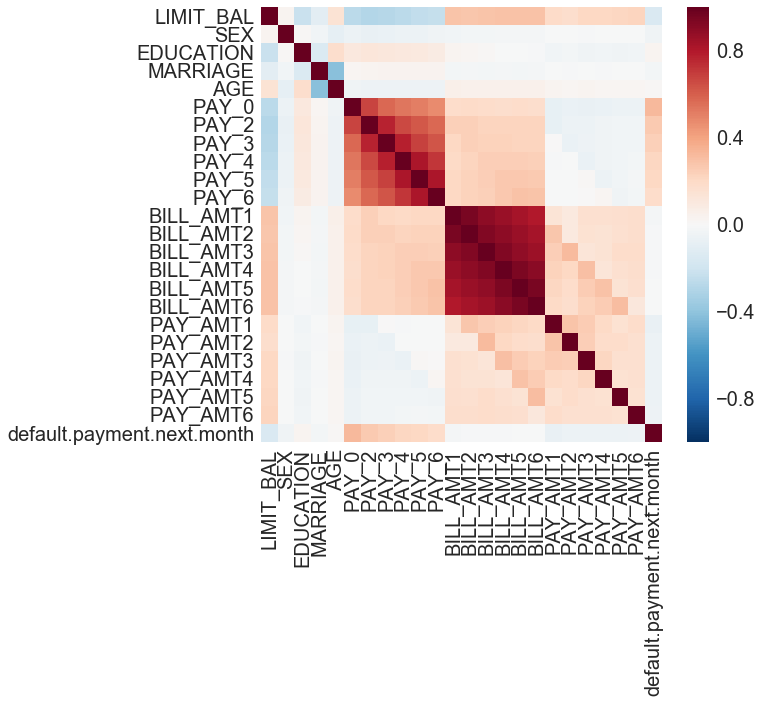

In [277]:
sns.set(font_scale=2)
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(dataset.corr(), vmin=-1, vmax=1)

print(dataset.corr()["default.payment.next.month"])

### On the cells below, we have visualizations of the data: First we use a bar plot to visualize the proportion of defaults each category of PAY_0 has. We can observe that as the payment delay increases, so does the chance that the client will default. 
### The trend seems to dissipate from "4", but by counting the occurences of these values, we can observe that the number of occurences of "4" and above is very small, representing only 0.47% of the values.

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64


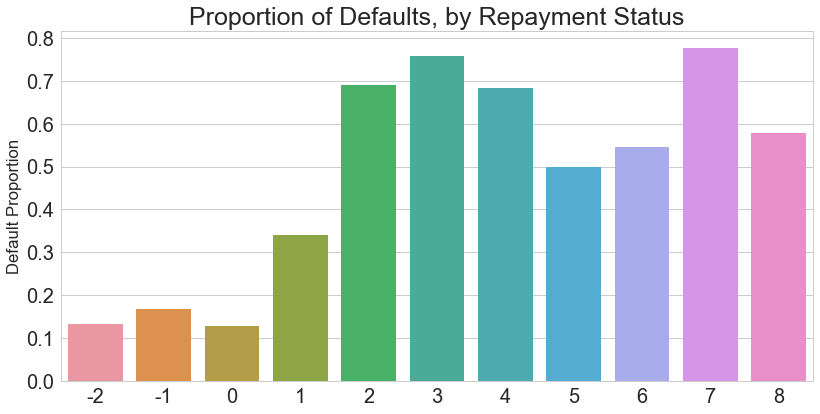

In [278]:
dataset["PAY_0"].value_counts()

group = dataset.groupby("PAY_0").agg([np.mean])
group = group['default.payment.next.month'].reset_index()

plt.style.use('fivethirtyeight')
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(12, 6))
sns.set(font_scale=1.5)

sns.barplot(x="PAY_0", y="mean", data=group)
ax.set(xlabel="", ylabel="Default Proportion")
ax.set_title(label="Proportion of Defaults, by Repayment Status", fontsize=25)
#ax.set_xticklabels(["Graduate School", "University", "High School", "Others", "Unknown", "Unknown"])

print(dataset["PAY_0"].value_counts())

### In the cell below, we plot the distributions of the credit loaned, defaulted (blue) or not defaulted(red).
### This visualization shows us that smaller credits tend to default more often.

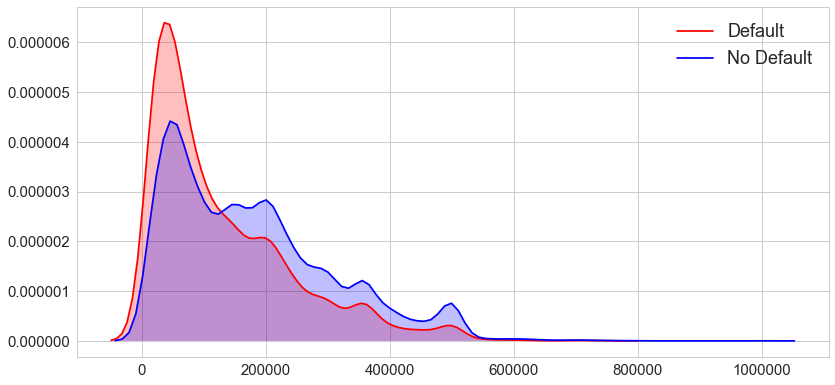

In [311]:
defaulted = dataset[dataset["default.payment.next.month"] == 1]
non_defaulted = dataset[dataset["default.payment.next.month"] == 0]
defaulted["Default"] = defaulted["LIMIT_BAL"]
non_defaulted["No Default"] = non_defaulted["LIMIT_BAL"]

plt.style.use('fivethirtyeight')
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(12, 6))
sns.set(font_scale=1.8)

ax = sns.kdeplot(defaulted["Default"], shade=True, color="r")
ax = sns.kdeplot(non_defaulted["No Default"], shade=True, color="b")

### On the cell below, we plot the proportion of defaults by education. We can observe that clients with higher education are less likely to default on the credit.

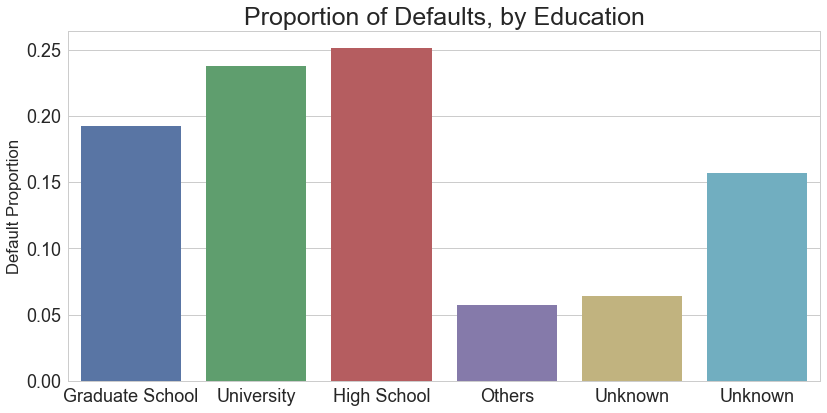

In [280]:
group = dataset.groupby("EDUCATION").agg([np.mean])
group = group["default.payment.next.month"].reset_index()
group = group[group["EDUCATION"] != 0]

plt.style.use('fivethirtyeight')
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(12, 6))
sns.set(font_scale=1.8)

sns.barplot(x="EDUCATION", y="mean", data=group)
ax.set(xlabel="", ylabel="Default Proportion")
ax.set_title(label="Proportion of Defaults, by Education", fontsize=25)
ax.set_xticklabels(["Graduate School", "University", "High School", "Others", "Unknown", "Unknown"])

### On the cell below, we plot the median credit amount by marital status. We can observe that married clients generally have higher credits.

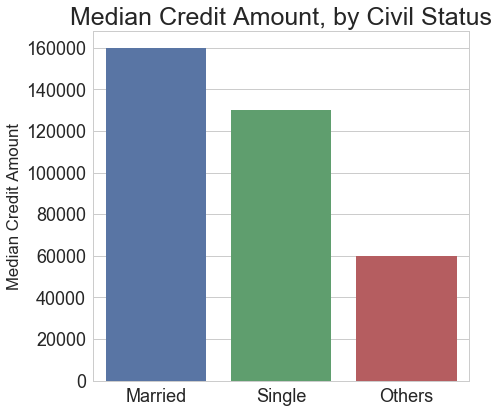

In [281]:
group = dataset.groupby('MARRIAGE').agg([np.median])
Credit_amount = group['LIMIT_BAL'].reset_index()
Credit_amount = Credit_amount[Credit_amount["MARRIAGE"] != 0]

plt.style.use('fivethirtyeight')
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(6, 6))
sns.set(font_scale=1.5)

ax = sns.barplot(x = 'MARRIAGE', y = 'median', data=Credit_amount)
ax.set(xlabel="", ylabel="Median Credit Amount")
ax.set_title(label="Median Credit Amount, by Civil Status", fontsize=25)
ax.set_xticklabels(["Married", "Single", "Others"])

## 3. Predictive Modelling using Machine Learning
### In the cells below, we create two predictive models: One using Logistic Regression, and another using a Random Forest Classifier.
### In order to reduce overfitting, we will perform cross-validation by consecutively splitting the data into training/testing sets (KFolds with 3 splits).
### Since there is a considerable unbalance between the labels (23364 cases where the client did not default, and 6636 cases where the client did default), we will set the "class_weight" parameter of the functions we use to "balanced", in order to compensate the difference.
### We will use the Area under Curve of the resulting Reciever Operating Characteristic (ROC) curve as our error metric. Higher values of area indicate a better sensitivity/fall-out ratio.
## Logistic Regression:

In [282]:
dataset["default.payment.next.month"].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

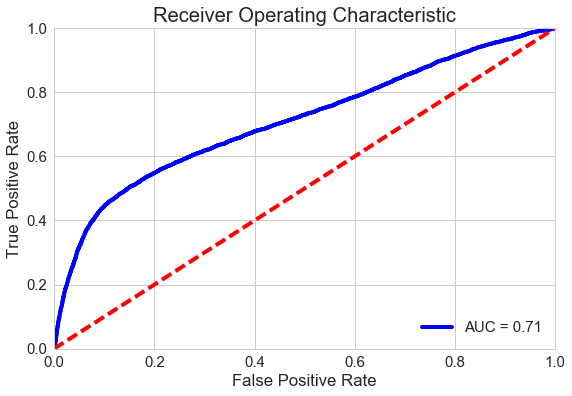

ROC Area under Curve: 0.710317669936

True Positive Rate(Sensitivity): 0.6345690174804098
False Positive Rate(Fall-out): 0.3286252354048964

Accuracy: 0.6632333333333333


In [307]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.cross_validation import KFold
from sklearn.model_selection import cross_val_predict

features = dataset.drop(["default.payment.next.month"], axis=1)
target = dataset["default.payment.next.month"]

lr = LogisticRegression(class_weight = "balanced")
kf = KFold(features.shape[0], random_state=1)

predictions = cross_val_predict(lr, features, target, cv=kf, method="predict_proba")

fpr, tpr, _ = roc_curve(target, predictions[:,1])
roc_auc = roc_auc_score(target, predictions[:,1])

plt.style.use('fivethirtyeight')
sns.set_style("whitegrid")

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("ROC Area under Curve: " + str(roc_auc))
print("")

predictions = cross_val_predict(lr, features, target, cv=kf)
predictions = pd.Series(predictions)

# False positives.
fp_filter = (predictions == 1) & (dataset["default.payment.next.month"] == 0)
fp = len(predictions[fp_filter])
# True positives.
tp_filter = (predictions == 1) & (dataset["default.payment.next.month"] == 1)
tp = len(predictions[tp_filter])
# False negatives.
fn_filter = (predictions == 0) & (dataset["default.payment.next.month"] == 1)
fn = len(predictions[fn_filter])
# True negatives
tn_filter = (predictions == 0) & (dataset["default.payment.next.month"] == 0)
tn = len(predictions[tn_filter])

# Rates
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

accuracy = (tp + tn) / len(predictions)

print("True Positive Rate(Sensitivity): " + str(tpr))
print("False Positive Rate(Fall-out): " + str(fpr))
#print("True Negative Rate: " + str(tnr))
#print("False Negative Rate:" + str(fnr))
print("")
print("Accuracy: " + str(accuracy))

## Random Forest Classifier:
### We obtain better results with this model, compared to the Logistic Regression. Fine tuning, by forcing the maximum depth of the decision trees to 10, wields a better ROC area under curve score.

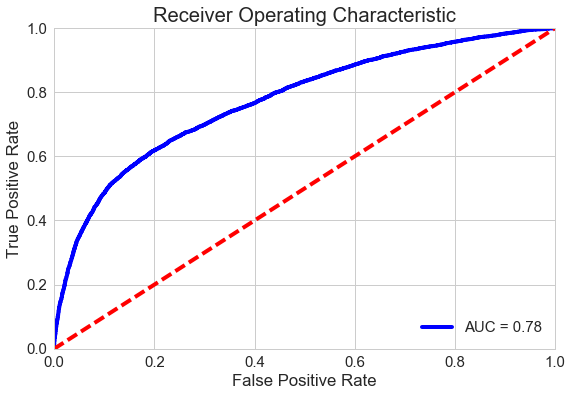

ROC Area under Curve: 0.775041419988

True Positive Rate(Sensitivity): 0.5525919228450874
False Positive Rate(Fall-out): 0.14171374764595104

Accuracy: 0.7906666666666666


In [308]:
from sklearn.ensemble import RandomForestClassifier

rnd_for = RandomForestClassifier(n_estimators=1000, random_state=1, class_weight = "balanced", max_depth=10)
kf = KFold(features.shape[0], random_state=1)

predictions = cross_val_predict(rnd_for, features, target, cv=kf, method="predict_proba")

fpr, tpr, _ = roc_curve(target, predictions[:,1])
roc_auc = roc_auc_score(target, predictions[:,1])

plt.style.use('fivethirtyeight')
sns.set_style("whitegrid")

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("ROC Area under Curve: " + str(roc_auc))
print("")

predictions = cross_val_predict(rnd_for, features, target, cv=kf)
predictions = pd.Series(predictions)

# False positives.
fp_filter = (predictions == 1) & (dataset["default.payment.next.month"] == 0)
fp = len(predictions[fp_filter])
# True positives.
tp_filter = (predictions == 1) & (dataset["default.payment.next.month"] == 1)
tp = len(predictions[tp_filter])
# False negatives.
fn_filter = (predictions == 0) & (dataset["default.payment.next.month"] == 1)
fn = len(predictions[fn_filter])
# True negatives
tn_filter = (predictions == 0) & (dataset["default.payment.next.month"] == 0)
tn = len(predictions[tn_filter])

# Rates
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

accuracy = (tp + tn) / len(predictions)

print("True Positive Rate(Sensitivity): " + str(tpr))
print("False Positive Rate(Fall-out): " + str(fpr))
#print("True Negative Rate: " + str(tnr))
#print("False Negative Rate:" + str(fnr))
print("")
print("Accuracy: " + str(accuracy))